In [1]:
import glob
import matplotlib.pyplot as plt
import cv2

In [6]:
data_dir = './pip_circle/dataset/seg_train/seg_train/buildings'

In [8]:
img_paths = glob.glob(f'{data_dir}/*.jpg')

In [11]:
label_list = ['buildings'] * len(img_paths)

In [18]:
img_list = []
for i in range(100):
    img = cv2.imread(img_paths[i])
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    img_list.append(img)

## ax로 subplot 먼저만들고 plt.imshow()로 구현가능

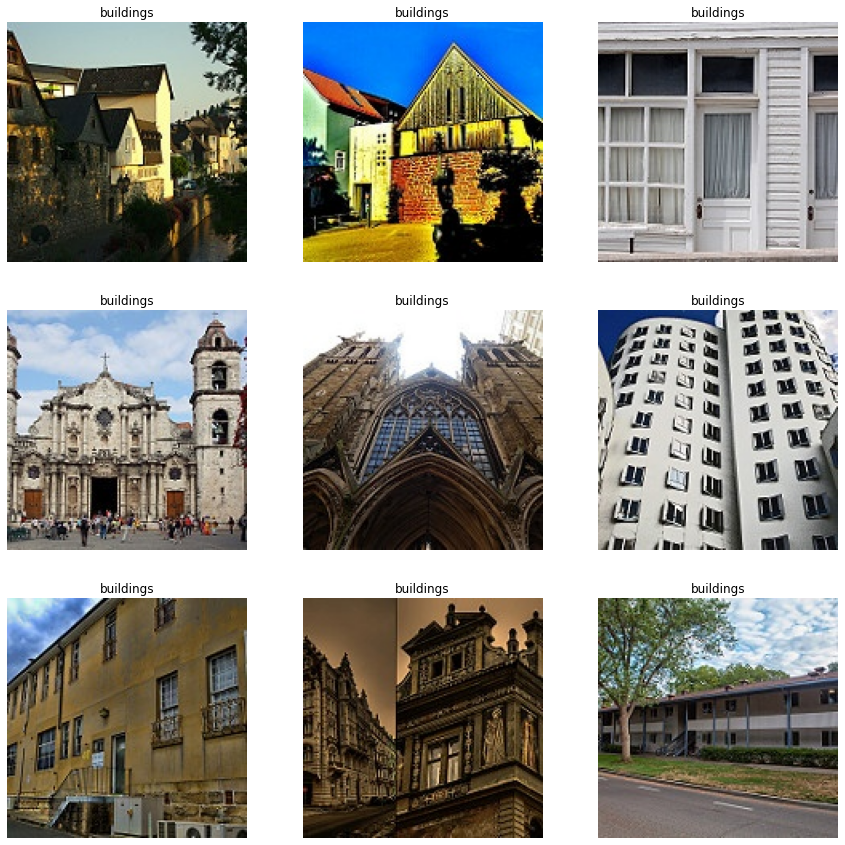

In [22]:
plt.figure(figsize = (15 , 15))
for i in range(9):
    ax = plt.subplot(3 , 3 , i +1)
    plt.imshow(img_list[i])
    plt.title(label_list[i])
    plt.axis('off')

### 간단하게 subplot(121)로 load 가능

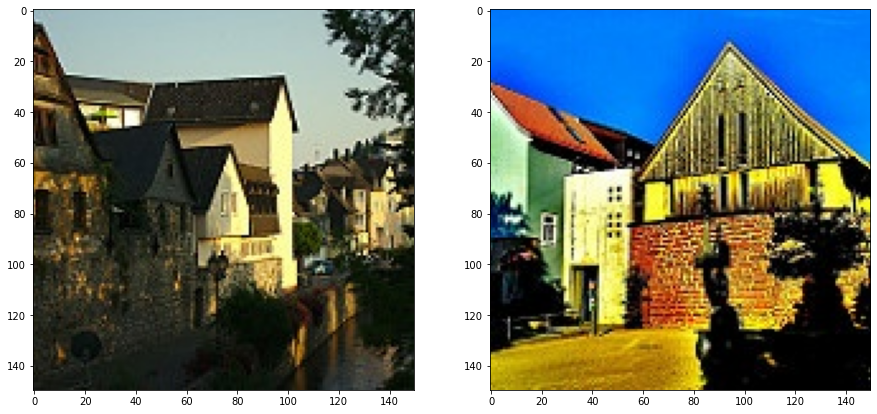

In [23]:
plt.figure(figsize = (15, 15 ))
plt.subplot(1 , 2, 1)
plt.imshow(img_list[0])
plt.subplot(122)
plt.imshow(img_list[1])

## ax로 호출함

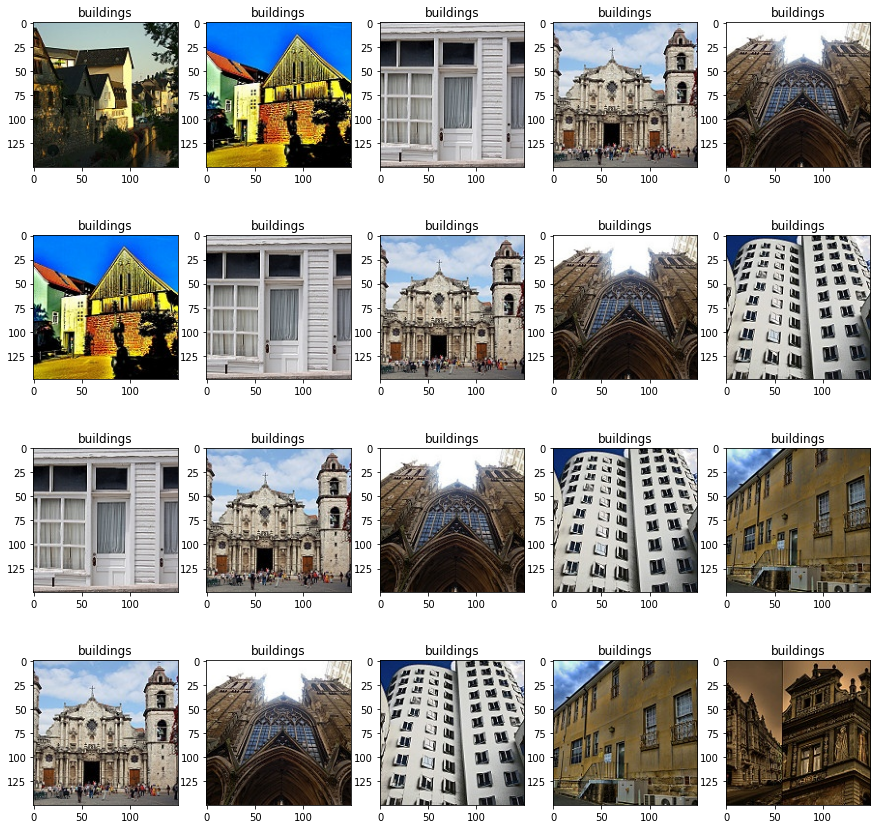

In [25]:
fig , ax = plt.subplots(4, 5, figsize = ( 15 , 15))
for i in range(4):
    for j in range(5):
        ax[i, j].set_title(label_list[i + j ])
        ax[i, j ].imshow(img_list[i + j])
plt.show()

## figure만들고 subplot add 함
#### plt.show 호출 가능

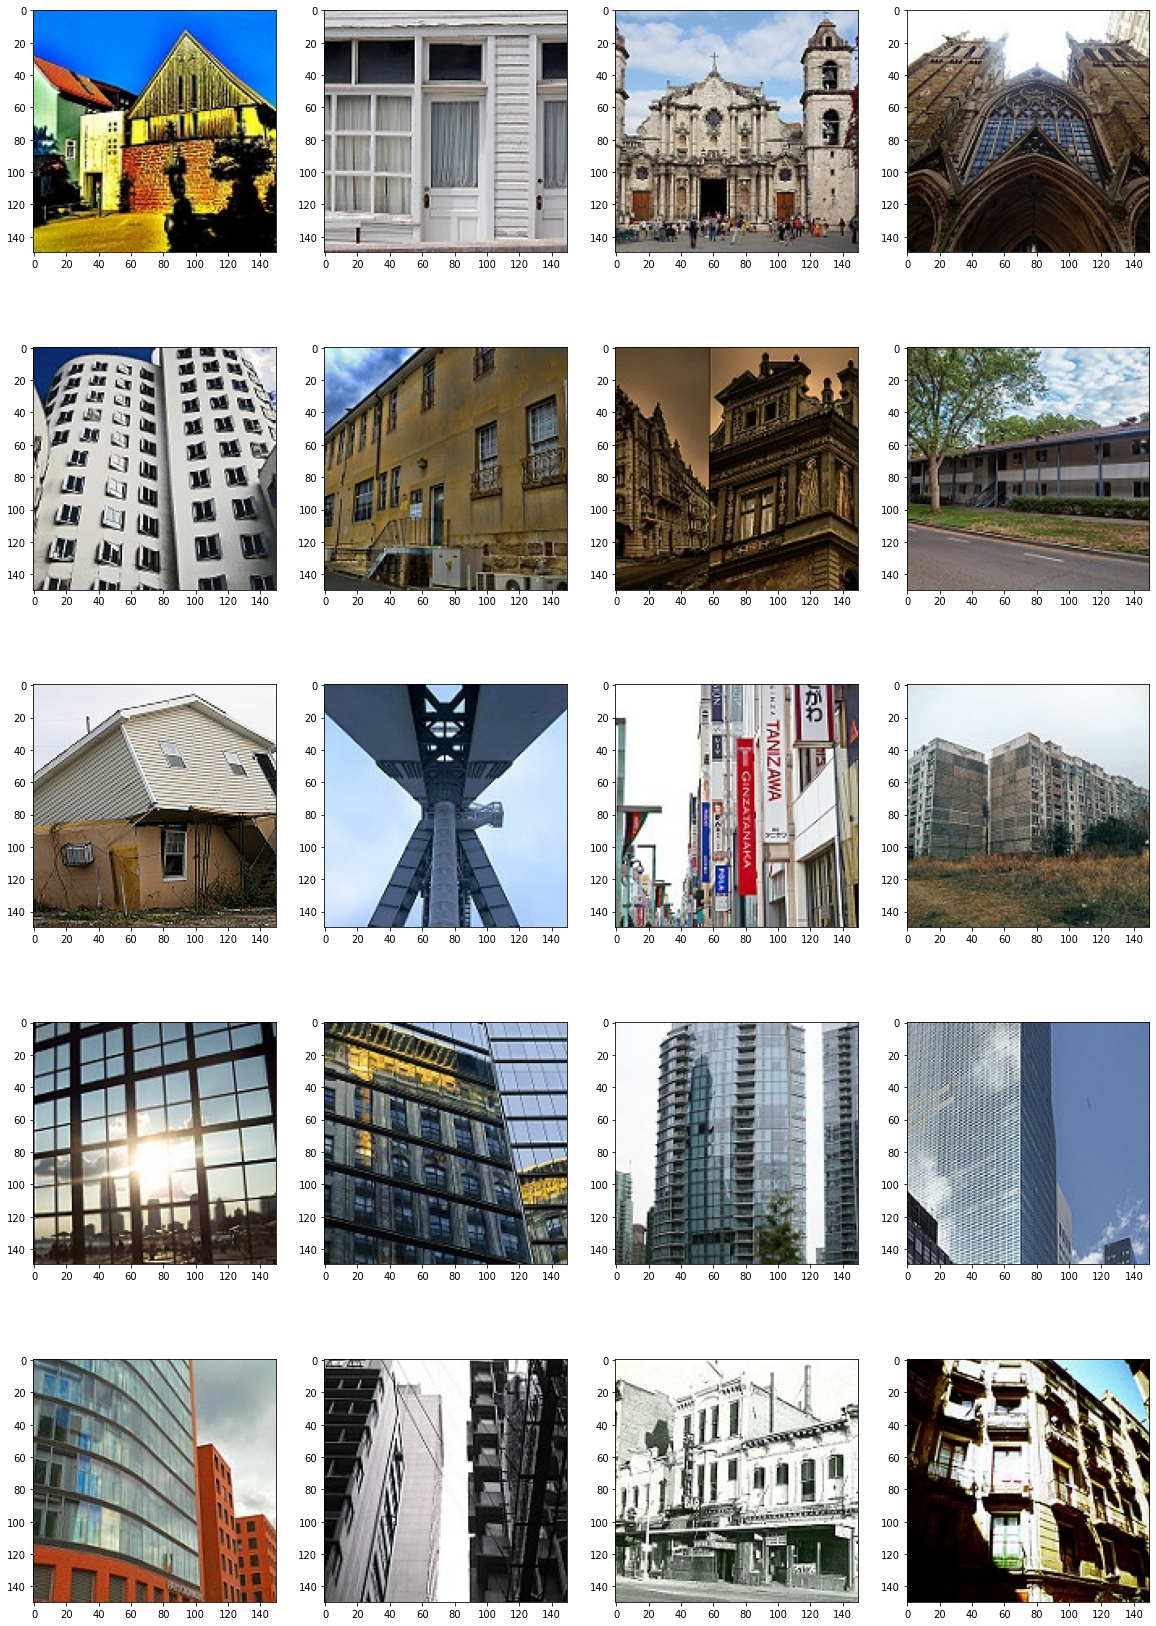

In [28]:
figure = plt.figure(figsize = ( 20 , 30) )
rows , cols = 5,  4
for i in range(1 , 21):
    try:
        figure.add_subplot(rows , cols , i)
        plt.imshow(img_list[i])
    except:
        pass

## roc_curve 그리기 및 계산


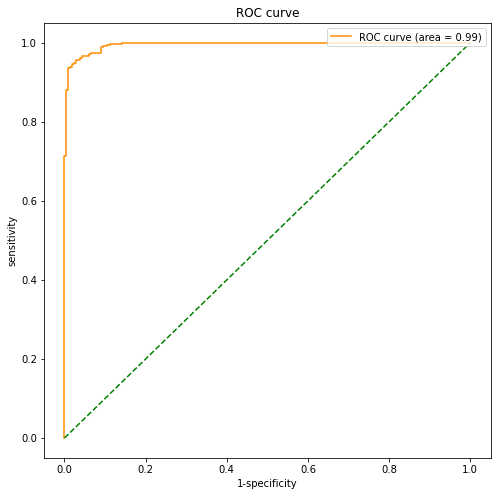

(0.994767718408118, <Figure size 576x576 with 1 Axes>)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
y_pred_proba = clf.predict_proba(X)[:, 1]

def plot_roc_curve(y , y_pred_proba):
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    fig , ax  = plt.subplots(1, 1 , figsize = (8,8)) 
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.title('ROC curve' )
    plt.xlabel('1-specificity')
    plt.ylabel('sensitivity')
    plt.plot([0 , 1] , [0 , 1] , 'g--')
    plt.legend( loc = 'upper right')
    plt.show()
    return roc_auc , fig

auc_score , fig = plot_roc_curve(y , y_pred_proba)
auc_score , fig

# loss acc그리기 plot

In [ ]:
import numpy as np


In [ ]:
np.

In [ ]:
metrics = {'train_loss' , }

In [3]:
# train , val acc , loss를 그리는 함수
def save_plot(metrics , ex_name = None , dir  = None ):
    fig , loss_ax = plt.subplots(figsize = (16, 5))
    du_ax = loss_ax.twinx()
    loss_ax.set_title('Train vs Val')
    loss_ax.plot(metrics['train_loss'] ,'purple' , label  = 'Train Loss')
    loss_ax.plot(metrics['val_loss'] ,  'deepskyblue' , label  = 'Val_loss')
    du_ax.plot(metrics['train_acc'] , 'red' , label = 'Train_Acc')
    du_ax.plot(metrics['val_acc'] ,'blue',   label = 'Val_Acc')
    loss_ax.set_xlabel('Epoch')
    loss_ax.set_ylabel('Loss' )
    du_ax.set_ylabel('Acc' ) 

    #make_legend
    handles , labels = du_ax.get_legend_handles_labels()
    legend1 = du_ax.legend(handles = handles , labels = labels , ncol = 2 , 
                     loc = 'upper left' , frameon=True)

    handles , labels = loss_ax.get_legend_handles_labels()
    legend1 = loss_ax.legend(handles = handles , labels = labels , ncol = 2 , 
                     loc = 'lower left' , frameon=True)

    loss_ax.grid(axis="both", c="lightgray")
    if ex_name == True:
        os.makedirs(dir , exist_ok= True)
        fig.savefig(f'{dir}{ex_name}_pred_val_plot.png', dpi=600 ,bbox_inches='tight')
    plt.show()
    plt.close(fig)

![image](https://user-images.githubusercontent.com/90737305/179434590-0443b5d6-3856-444f-b4fb-b5bc00134d62.png)

## cv2imread

In [3]:
def imgread(image_path , to_gray = False):
    if to_gray == True:
        image = cv2.imread(image_path ,  cv2.IMREAD_GRAYSCALE)
    elif to_gray == False:
        image = cv2.imread(image_path , cv2.IMREAD_COLOR )
        image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    return image 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_fs = pd.read_excel("frictionstress.xlsx")
df_fs

Alloy  E [GPa]  σ0 [MPa]
0             Ni      199      21.8
1        Ni-40Co      213      51.9
2         FeMnNi      182     119.0
3         CoMnNi      190      85.5
4         CoFeNi      161      62.6
5         CoCrNi      226     218.0
6   (CoNi)80Cr20      223     167.0
7    (CoNi)95Cr5      219      30.2
8       CoFeMnNi      186     108.0
9       CoCrFeNi      210     123.0
10  Co20(CrNi)80      240     280.0
11    CoCrFeMnNi      202     125.0

In [16]:
# 합금 이름
alloy = df_fs.iloc[:, 0].values.copy()

# elastic modulus
ela = df_fs.iloc[:, 1].values.copy()

# friction stress
sigma = df_fs.iloc[:, 2].values.copy()

# normalized friction stress
sigma_norm = sigma / ela

<BarContainer object of 12 artists>

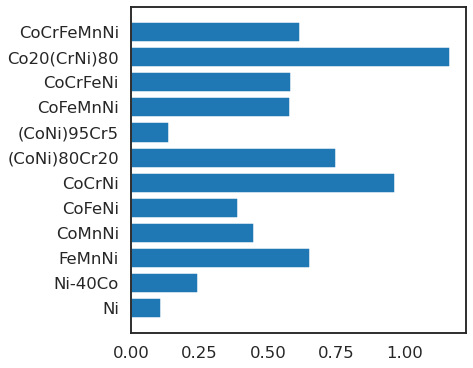

In [17]:
# 시각화 설정
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

# 시각화
fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(alloy, sigma_norm)

In [18]:
df_fs["sigma_norm"] = sigma_norm
df_fs = df_fs.sort_values("sigma_norm")
df_fs

Alloy  E [GPa]  σ0 [MPa]  sigma_norm
0             Ni      199      21.8    0.109548
7    (CoNi)95Cr5      219      30.2    0.137900
1        Ni-40Co      213      51.9    0.243662
4         CoFeNi      161      62.6    0.388820
3         CoMnNi      190      85.5    0.450000
8       CoFeMnNi      186     108.0    0.580645
9       CoCrFeNi      210     123.0    0.585714
11    CoCrFeMnNi      202     125.0    0.618812
2         FeMnNi      182     119.0    0.653846
6   (CoNi)80Cr20      223     167.0    0.748879
5         CoCrNi      226     218.0    0.964602
10  Co20(CrNi)80      240     280.0    1.166667

<BarContainer object of 12 artists>

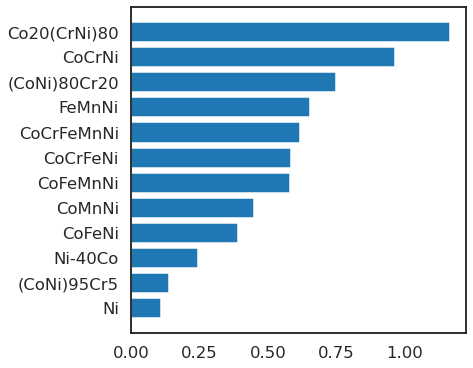

In [19]:
alloy = df_fs.iloc[:, 0].values.copy()
sigma_norm = df_fs.iloc[:, 3].values.copy()

fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(alloy, sigma_norm)


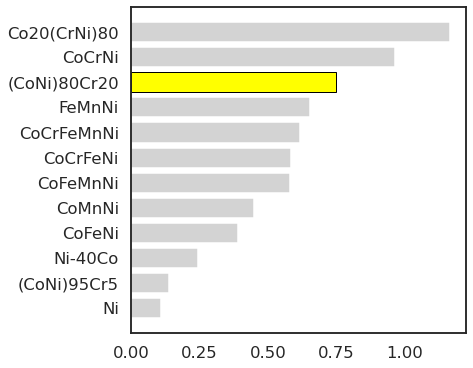

In [20]:
ig, ax = plt.subplots(figsize=(6, 6))
ax.barh(alloy, sigma_norm, fc="lightgray")

# 막대들 모으기
bars = ax.patches
bars[-3].set_facecolor("yellow")
bars[-3].set_edgecolor("k")
bars[-3].set_linewidth(1)

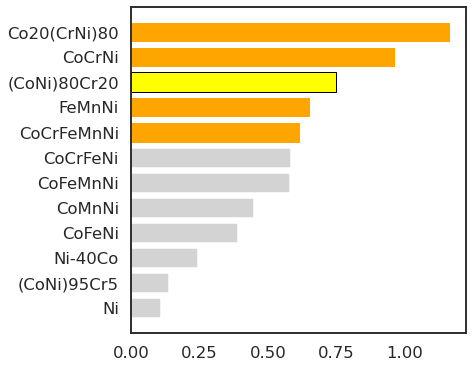

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(alloy, sigma_norm, fc="lightgray")

# 막대들 모으기
bars = ax.patches

for bar in bars:
    if bar.get_width() > 0.6:
        bar.set_facecolor("orange")
        bar.set_linewidth(1)

bars[-3].set_facecolor("yellow")
bars[-3].set_edgecolor("k")
bars[-3].set_linewidth(1)

Text(0.5, 1.0, 'Friction Stress ($\\sigma_0 / E$, 10$^{-3}$)')

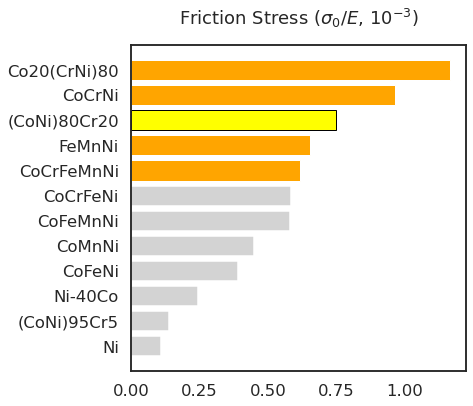

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(alloy, sigma_norm, fc="lightgray")

bars = ax.patches

for bar in bars:
    if bar.get_width() > 0.6:
        bar.set_facecolor("orange")
        bar.set_linewidth(1)

bars[-3].set_facecolor("yellow")
bars[-3].set_edgecolor("k")
bars[-3].set_linewidth(1)

# 제목 달기
ax.set_title("Friction Stress ($\sigma_0 / E$, 10$^{-3}$)", pad=20)

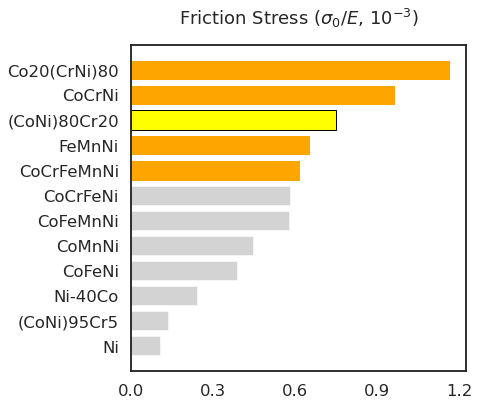

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(alloy, sigma_norm, fc="lightgray")

bars = ax.patches

for bar in bars:
    if bar.get_width() > 0.6:
        bar.set_facecolor("orange")
        bar.set_linewidth(1)

bars[-3].set_facecolor("yellow")
bars[-3].set_edgecolor("k")
bars[-3].set_linewidth(1)

ax.set_title("Friction Stress ($\sigma_0 / E$, 10$^{-3}$)", pad=20)

# x축 눈금 지정
xticks = np.linspace(0, 1.2, 5)
ax.set_xticks(xticks)

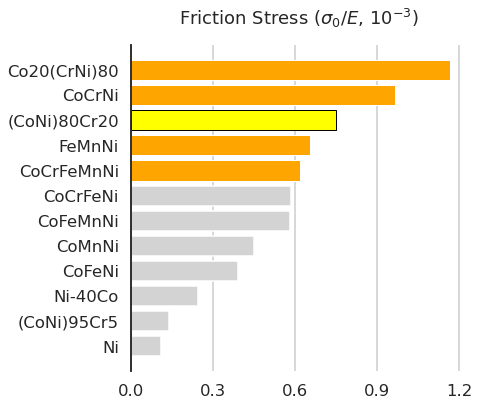

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(alloy, sigma_norm, fc="lightgray")

bars = ax.patches
for bar in bars:
    if bar.get_width() > 0.6:
        bar.set_facecolor("orange")
        bar.set_linewidth(1)

bars[-3].set_facecolor("yellow")
bars[-3].set_edgecolor("k")
bars[-3].set_linewidth(1)

ax.set_title("Friction Stress ($\sigma_0 / E$, 10$^{-3}$)", pad=20)

xticks = np.linspace(0, 1.2, 5)
ax.set_xticks(xticks)

# 테두리 지우기
ax.spines[["top", "right", "bottom"]].set_visible(False)

# 눈금 넣기
ax.grid(axis="x")

[Text(0, 0, 'Ni'),
 Text(0, 1, '(CoNi)$_{95}$Cr$_5$'),
 Text(0, 2, 'Ni-40Co'),
 Text(0, 3, 'CoFeNi'),
 Text(0, 4, 'CoMnNi'),
 Text(0, 5, 'CoFeMnNi'),
 Text(0, 6, 'CoCrFeNi'),
 Text(0, 7, 'CoCrFeMnNi'),
 Text(0, 8, 'FeMnNi'),
 Text(0, 9, '(CoNi)$_{80}$Cr$_{20}$'),
 Text(0, 10, 'CoCrNi'),
 Text(0, 11, 'Co$_{20}$(CrNi)$_{80}$')]

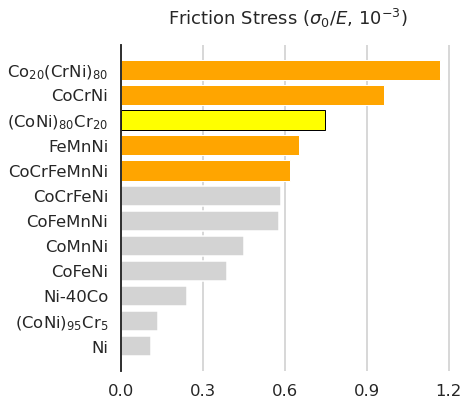

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(alloy, sigma_norm, fc="lightgray")

bars = ax.patches
for bar in bars:
    if bar.get_width() > 0.6:
        bar.set_facecolor("orange")
        bar.set_linewidth(1)

bars[-3].set_facecolor("yellow")
bars[-3].set_edgecolor("k")
bars[-3].set_linewidth(1)

ax.set_title("Friction Stress ($\sigma_0 / E$, 10$^{-3}$)", pad=20)

xticks = np.linspace(0, 1.2, 5)
ax.set_xticks(xticks)

ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.grid(axis="x")

# alloy 이름에 아래첨자 추가
yticks = ax.get_yticks()
yticklabels = alloy
yticklabels[1] = "(CoNi)$_{95}$Cr$_5$"
yticklabels[-3] = "(CoNi)$_{80}$Cr$_{20}$"
yticklabels[-1] = "Co$_{20}$(CrNi)$_{80}$"
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

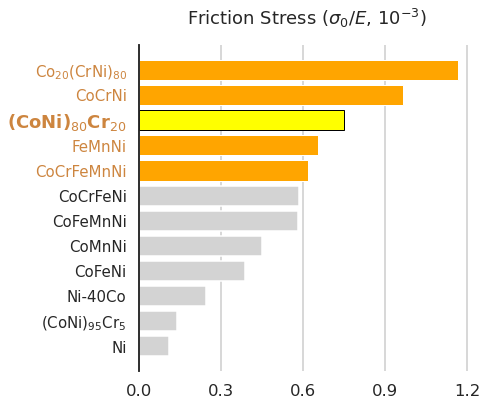

In [26]:
yticks = ax.get_yticks()
yticklabels = ax.get_yticklabels()

# 물질 이름 색상, 크기 수정
for bar, ytl in zip(bars, yticklabels):
    if bar.get_width() > 0.6:
        ytl.set_color("peru")
    ytl.set_fontsize("small")
        
yticklabels[-3].set_fontweight("bold")
yticklabels[-3].set_fontsize("medium")

display(fig)